In [1]:
using Pkg
Pkg.activate("..")

  Activating environment at `~/avg/WoR/world_on_rails.jl/Project.toml`


In [2]:
using Revise

In [3]:
push!(LOAD_PATH, joinpath(dirname(pwd()), "src", "data"))

4-element Vector{String}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/enes/avg/WoR/world_on_rails.jl/src/data"

# DataLoader for Main Model

In [9]:
import main_dataset: LabeledMainDataset

In [10]:
main_dataset = LabeledMainDataset("/home/enes/avg/WoR/world_on_rails.jl/data/main_mini",
     "/home/enes/avg/WoR/world_on_rails.jl/configs/config.yaml");

/home/enes/avg/WoR/world_on_rails.jl/data/main_mini: 363 frames (x3)


In [11]:
main_dataset.augmenter

7-element Vector{PyCall.PyObject}:
 PyObject Sometimes(p=Binomial(Deterministic(float 0.20000000)), name=UnnamedSometimes, then_list=Sequential(name=UnnamedSometimes-then, random_order=False, children=[GaussianBlur(name=UnnamedGaussianBlur, parameters=[Uniform(Deterministic(int 0), Deterministic(float 0.50000000))], deterministic=False)], deterministic=False), else_list=None, deterministic=False)
 PyObject Sometimes(p=Binomial(Deterministic(float 0.20000000)), name=UnnamedSometimes, then_list=Sequential(name=UnnamedSometimes-then, random_order=False, children=[AdditiveGaussianNoise(name=UnnamedAdditiveGaussianNoise, parameters=[Normal(loc=Deterministic(int 0), scale=Uniform(Deterministic(float 0.00000000), Deterministic(float 12.75000000))), Binomial(Deterministic(float 0.50000000))], deterministic=False)], deterministic=False), else_list=None, deterministic=False)
 PyObject Sometimes(p=Binomial(Deterministic(float 0.20000000)), name=UnnamedSometimes, then_list=Sequential(name=UnnamedS

## Main img visualization

In [6]:
using Images

In [7]:
img = Array(main_dataset[1][1]);

LoadError: MethodError: no method matching augment_img(::Vector{PyCall.PyObject}, ::Array{N0f8, 3})
[0mClosest candidates are:
[0m  augment_img([91m::PyCall.PyObject[39m, ::Array) at /home/enes/avg/WoR/world_on_rails.jl/src/data/main_dataset.jl:120

In [43]:
img = permutedims(img, (3,1,2));

In [44]:
size(img)

(3, 193, 480)

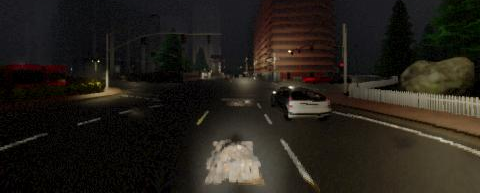

In [45]:
img_rgb = colorview(RGB, img)

## Act val vis

In [51]:
main_dataset[1][5]

28×4×6 Knet.KnetArrays.KnetArray{Float32, 3}:
[:, :, 1] =
 0.957224  0.932526  0.428275  0.237606
 0.971438  1.15929   0.664114  0.415488
 0.980962  1.24901   0.923563  0.574927
 0.987574  1.30826   1.0457    0.734809
 0.989072  1.32588   1.08133   0.771495
 0.957188  1.14214   0.805325  0.562069
 0.921557  0.949503  0.581062  0.456128
 0.878715  0.733887  0.462459  0.334281
 0.824732  0.577492  0.326122  0.184719
 0.961238  0.932227  0.427769  0.237606
 0.975497  1.15964   0.661975  0.415488
 0.98505   1.24974   0.919751  0.574927
 0.991683  1.30932   1.04132   0.734809
 ⋮                             
 0.882419  0.732998  0.462012  0.334281
 0.828241  0.57708   0.32608   0.184719
 0.965253  0.931929  0.427263  0.237606
 0.979556  1.15998   0.659836  0.415488
 0.989139  1.25047   0.915939  0.574927
 0.995792  1.31037   1.03694   0.734809
 0.997293  1.32826   1.07209   0.771495
 0.965171  1.14268   0.799652  0.562069
 0.929276  0.948628  0.578681  0.456128
 0.886122  0.732109  0.461565 

## Segmentation images

In [68]:
segimg = main_dataset[1][2]

193×480 Knet.KnetArrays.KnetMatrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

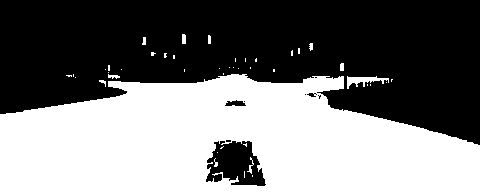

In [74]:
colorview(Gray, Array(segimg))